In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
import ROOT

Fazendo os gráficos mostrados no PDF

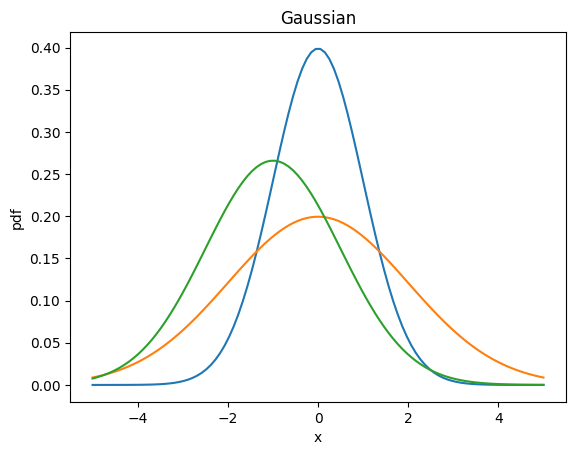

In [2]:
for values in [(0, 1), (0, 2), (-1, 1.5)]:
    x = np.linspace(-5, 5, 100)
    y = norm.pdf(x, loc=values[0], scale=values[1]) 
    plt.plot(x, y)
    plt.title('Gaussian')
    plt.xlabel('x')
    plt.ylabel('pdf')
plt.show()

# cristal ball (pagina 10)

In [3]:
def crystal_ball(x, beta, m):
    if x >= -beta:
        return np.exp(-x**2 / 2)
    else:
        n = (m / abs(beta))**m * np.exp(-beta**2 / 2)
        return n * (m / abs(beta) - beta - x)**(-m)

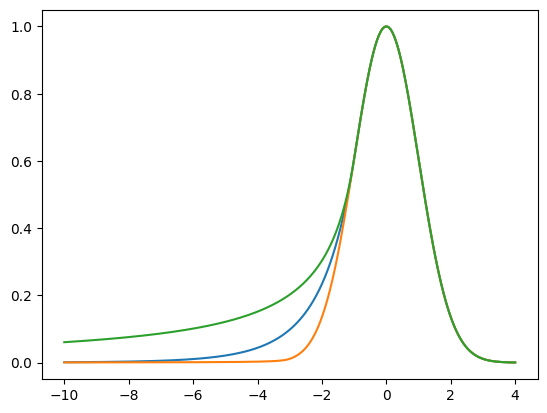

In [4]:
x = np.linspace(-10, 4, 500)
for values in [(1, 10), (3, 1), (1, 1)]:
    gaussian_y = norm.pdf(x, loc=0, scale=1)
    crystal_ball_y = np.array([crystal_ball(xi, beta=values[0], m=values[1]) for xi in x])
    plt.plot(x, crystal_ball_y)
plt.show()

página 18

o jeito que ocorre no Root, ele está fitando uma curva gaussiana;

no jeito padrão, faríamos o abaixo:

In [5]:
x = np.linspace(-10, 10, 50000)
y = norm.pdf(x, loc=0, scale=3)

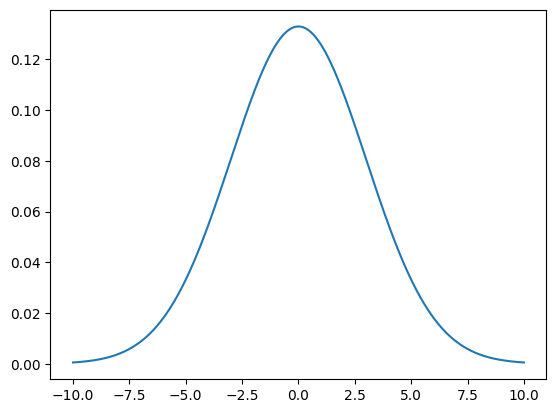

In [6]:
plt.plot(x, y)
plt.show()

O mesmo código abaixo [está aqui](plotGaussian.cpp)

In [20]:
x_root = ROOT.RooRealVar("x", "x", 0, -10, 10)
mean_root = ROOT.RooRealVar("mean", "mean da gaussian", 0, -1, 10)
width_root = ROOT.RooRealVar("width", "width", 3, 0.1, 10)
g = ROOT.RooGaussian("g", "gaussian", x_root, mean_root, width_root)
frame = x_root.frame()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


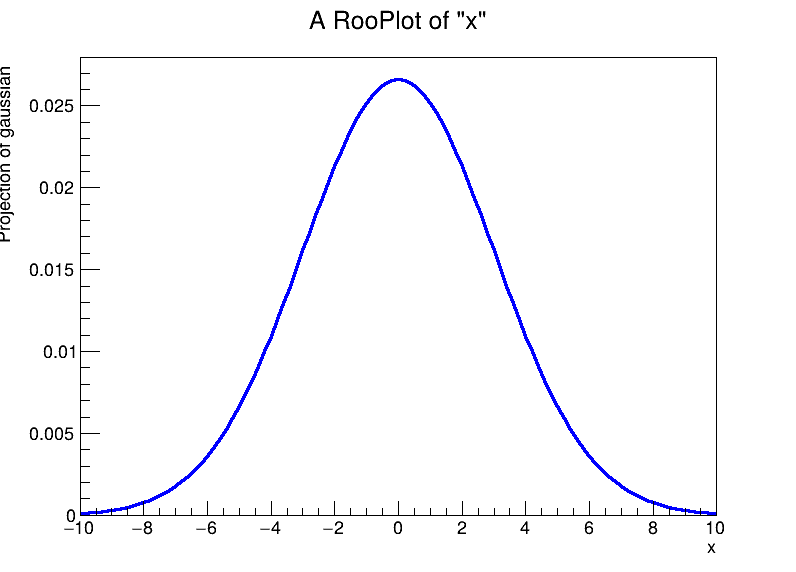

In [21]:
c = ROOT.TCanvas("c", "Canvas", 800, 600)
g.plotOn(frame)
frame.Draw()
c.Draw()